<a href="https://colab.research.google.com/github/AndreaPoteYong/MINERIA_DE_DATOS/blob/main/VALORES_ATIPICOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import random

# Detección de Valores Atípicos en Bases de Datos

## Integrantes
- Andrea Carolina Pote Yong
- Betania Alejos Rodriguez
- Johan Bustos


Mineria de Datos – Segundo Corte  
Fecha: 30 / 09 / 2025  

---

## 1. Introducción

En el análisis de datos, los **valores atípicos** (outliers) son observaciones que se alejan significativamente del comportamiento general del conjunto. Su detección es fundamental para mejorar la calidad de los modelos, evitar sesgos en los resultados y descubrir fenómenos poco comunes como fraudes, errores de medición o casos excepcionales.

Este trabajo tiene como objetivo aplicar diferentes métodos para **detectar valores atípicos** en un conjunto de datos utilizando técnicas de minería de datos. Se tomó como referencia la librería y materiales del repositorio [Libro-Minería-de-datos](https://github.com/jcasasr/Libro-Mineria-de-datos).

---

## 2. Objetivo General

Aplicar técnicas de minería de datos para identificar y analizar valores atípicos en un conjunto de datos, usando métodos estadísticos y algoritmos especializados.

### Objetivos Específicos

1. Explicar el concepto de valor atípico y su relevancia en la minería de datos.  
2. Seleccionar y describir una base de datos para aplicar métodos de detección.  
3. Implementar algoritmos de detección de valores atípicos y visualizar resultados.  

---

## 3. Marco Teórico

Los **valores atípicos** pueden ser datos erróneos, mediciones extremas o casos únicos. Su presencia afecta estadísticas como la media y la varianza, así como los modelos predictivos.

**Métodos de detección:**

- **Estadísticos simples:**
  - **Z-score**: mide cuántas desviaciones estándar está un punto respecto a la media.
  - **Rango intercuartílico (IQR)**: puntos fuera del rango Q1 – 1.5 IQR y Q3 + 1.5 IQR se consideran atípicos.

- **Visualización:**
  - Diagramas de caja.
  - Diagramas de dispersión.

- **Algoritmos avanzados:**
  - **Isolation Forest**.
  - **Local Outlier Factor (LOF)**.
  - **DBSCAN**.

Estos métodos son ampliamente utilizados en minería de datos para la limpieza de datos y la detección temprana de anomalías.

## 4. Implementacion en Phyton


In [ ]:
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Supera
0,GP,F,18,U,GT3,A,Superior,Superior,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Si
1,GP,F,17,U,GT3,T,Primaria_Superior,Primaria_Superior,at_home,other,...,3,3,1,1,3,2,9,11,11,Si
2,GP,F,15,U,LE3,T,Primaria_Superior,Primaria_Superior,at_home,other,...,3,2,2,3,3,6,12,13,12,Si
3,GP,F,15,U,GT3,T,Superior,Grado_9,health,services,...,2,2,1,1,5,0,14,14,14,Si
4,GP,F,16,U,GT3,T,Secundaria,Secundaria,other,other,...,3,2,1,2,5,0,11,13,13,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,Grado_9,Grado_9,services,services,...,5,4,4,5,4,11,9,9,9,No
1040,MS,M,17,U,LE3,T,Secundaria,Primaria_Superior,services,services,...,4,5,3,4,2,3,14,16,16,Si
1041,MS,M,21,R,GT3,T,Primaria_Superior,Primaria_Superior,other,other,...,5,3,3,3,3,3,10,8,7,No
1042,MS,M,18,R,LE3,T,Secundaria,Grado_9,services,other,...,4,1,3,4,5,0,11,12,10,Si


In [ ]:
df = pd.read_csv("B2.332_Students.csv")

print("Vista general del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

Vista general del dataset:
  school sex  age address famsize Pstatus               Medu  \
0     GP   F   18       U     GT3       A           Superior   
1     GP   F   17       U     GT3       T  Primaria_Superior   
2     GP   F   15       U     LE3       T  Primaria_Superior   
3     GP   F   15       U     GT3       T           Superior   
4     GP   F   16       U     GT3       T         Secundaria   

                Fedu     Mjob      Fjob  ... freetime goout Dalc Walc  health  \
0           Superior  at_home   teacher  ...        3     4    1    1       3   
1  Primaria_Superior  at_home     other  ...        3     3    1    1       3   
2  Primaria_Superior  at_home     other  ...        3     2    2    3       3   
3            Grado_9   health  services  ...        2     2    1    1       5   
4         Secundaria    other     other  ...        3     2    1    2       5   

  absences  G1  G2  G3 Supera  
0        4   0  11  11     Si  
1        2   9  11  11     Si  
2    

In [ ]:
# Definir el diccionario de mapeo: {'nombre_antiguo': 'nombre_nuevo'}
cambios_dict = {
    'school': 'escuela',
    'sex': 'genero',
    'age': 'edad',
    'famsize': 'tamaño_familia',
    'G1': 'nota_periodo_1',
    'G2': 'nota_periodo_2',
    'G3': 'nota_final',
    'Pstatus': 'estado_civil',
    'Medu': 'nivel_educacion_madre',
    'Fedu': 'nivel_educacion_padre',
    'Mjob': 'trabajo_madre',
    'Fjob': 'trabajo_padre',
    'reason': 'razon_de_ausencia',
    'guardian': 'guardian',
    'traveltime': 'tiempo_de_viaje',
    'studytime': 'tiempo_de_estudio',
    'failures': 'numero_de_fallas',
    'schoolsup': 'educacion_adicional',
    'famsup': 'educacion_adicional_familia',
    'paid': 'educacion_adicional_extra',
    'activities': 'actividades',
    'address': 'dirección',
    'internet': 'internet',
    'romantic': 'relacion_romantico',
    'famrel': 'relacion_familiar',
    'freetime': 'tiempo_libre',
    'goout': 'tiempo_con_amigos',
    'Dalc': 'consumo_alcohol_dia',
    'Walc': 'consumo_alcohol_semana',
    'health': 'salud',
    'absences': 'inasistencias',

}

df.rename(columns=cambios_dict, inplace=True)

# Verificar el resultado
print("\n--- Columnas Después de .rename() ---")
print(df[['escuela', 'genero', 'edad', 'nota_final']].head(2))
print("\nNombres de columnas renombradas:")
print([col for col in df.columns if col in cambios_dict.values()])


--- Columnas Después de .rename() ---
  escuela genero  edad  nota_final
0      GP      F    18          11
1      GP      F    17          11

Nombres de columnas renombradas:
['escuela', 'genero', 'edad', 'dirección', 'tamaño_familia', 'estado_civil', 'nivel_educacion_madre', 'nivel_educacion_padre', 'trabajo_madre', 'trabajo_padre', 'razon_de_ausencia', 'guardian', 'tiempo_de_viaje', 'tiempo_de_estudio', 'numero_de_fallas', 'educacion_adicional', 'educacion_adicional_familia', 'educacion_adicional_extra', 'actividades', 'internet', 'relacion_romantico', 'relacion_familiar', 'tiempo_libre', 'tiempo_con_amigos', 'consumo_alcohol_dia', 'consumo_alcohol_semana', 'salud', 'inasistencias', 'nota_periodo_1', 'nota_periodo_2', 'nota_final']


In [ ]:
num_columns = df.shape[1]
print(f"-----------------------------El número total de columnas en el dataset es: {num_columns}---------------------------")
display(df.head(5))

-----------------------------El número total de columnas en el dataset es: 34---------------------------


,escuela,genero,edad,dirección,tamaño_familia,estado_civil,nivel_educacion_madre,nivel_educacion_padre,trabajo_madre,trabajo_padre,...,tiempo_libre,tiempo_con_amigos,consumo_alcohol_dia,consumo_alcohol_semana,salud,inasistencias,nota_periodo_1,nota_periodo_2,nota_final,Supera
0,GP,F,18,U,GT3,A,Superior,Superior,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Si
1,GP,F,17,U,GT3,T,Primaria_Superior,Primaria_Superior,at_home,other,...,3,3,1,1,3,2,9,11,11,Si
2,GP,F,15,U,LE3,T,Primaria_Superior,Primaria_Superior,at_home,other,...,3,2,2,3,3,6,12,13,12,Si
3,GP,F,15,U,GT3,T,Superior,Grado_9,health,services,...,2,2,1,1,5,0,14,14,14,Si
4,GP,F,16,U,GT3,T,Secundaria,Secundaria,other,other,...,3,2,1,2,5,0,11,13,13,Si


## **1. Limpieza de datos:** selección de variables numéricas, tratamiento de nulos.  


In [ ]:
df_num = df.select_dtypes(include=[np.number])
print("\nVariables numéricas seleccionadas:")
print(df_num.columns)

# Añadir valores nulos con la media de cada columna
df_num = df_num.fillna(df_num.mean())


Variables numéricas seleccionadas:
Index(['edad', 'numero_de_fallas', 'relacion_familiar', 'tiempo_libre',
       'tiempo_con_amigos', 'consumo_alcohol_dia', 'consumo_alcohol_semana',
       'salud', 'inasistencias', 'nota_periodo_1', 'nota_periodo_2',
       'nota_final'],
      dtype='object')


## **2. Método estadístico:** cálculo de outliers por rango intercuartílico.

In [ ]:
print("\nDetección de outliers con IQR:")

outliers_iqr = pd.DataFrame()

for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = ((df_num[col] < lower_limit) | (df_num[col] > upper_limit))
    outliers_iqr[col] = outliers

    print(f" - {col}: {outliers.sum()} outliers detectados")


Detección de outliers con IQR:
 - edad: 2 outliers detectados
 - numero_de_fallas: 183 outliers detectados
 - relacion_familiar: 77 outliers detectados
 - tiempo_libre: 64 outliers detectados
 - tiempo_con_amigos: 0 outliers detectados
 - consumo_alcohol_dia: 52 outliers detectados
 - consumo_alcohol_semana: 0 outliers detectados
 - salud: 0 outliers detectados
 - inasistencias: 54 outliers detectados
 - nota_periodo_1: 1 outliers detectados
 - nota_periodo_2: 20 outliers detectados
 - nota_final: 54 outliers detectados


## **3. Método algorítmico:** uso de Isolation Forest para detectar valores atípicos.

In [ ]:
#   - Selección aleatoria de una característica
#   - Corte aleatorio dentro del rango min–max
#   - Partición de los datos y recursión hasta aislar puntos
#   - Los puntos que se aíslan rápidamente suelen ser outliers

iso = IsolationForest(
    contamination=0.05,    # proporción esperada de outliers
    random_state=42
)
df_num["anomaly_score"] = iso.fit_predict(df_num)

# -1 = outlier, 1 = normal
df_num["is_outlier"] = df_num["anomaly_score"].apply(lambda x: True if x == -1 else False)

print("\nResultados de Isolation Forest:")
print(df_num["is_outlier"].value_counts())


Resultados de Isolation Forest:
is_outlier
False    991
True      53
Name: count, dtype: int64


## **4. Visualización:** creación de gráficos de dispersión y diagramas de caja para identificar visualmente los outliers.

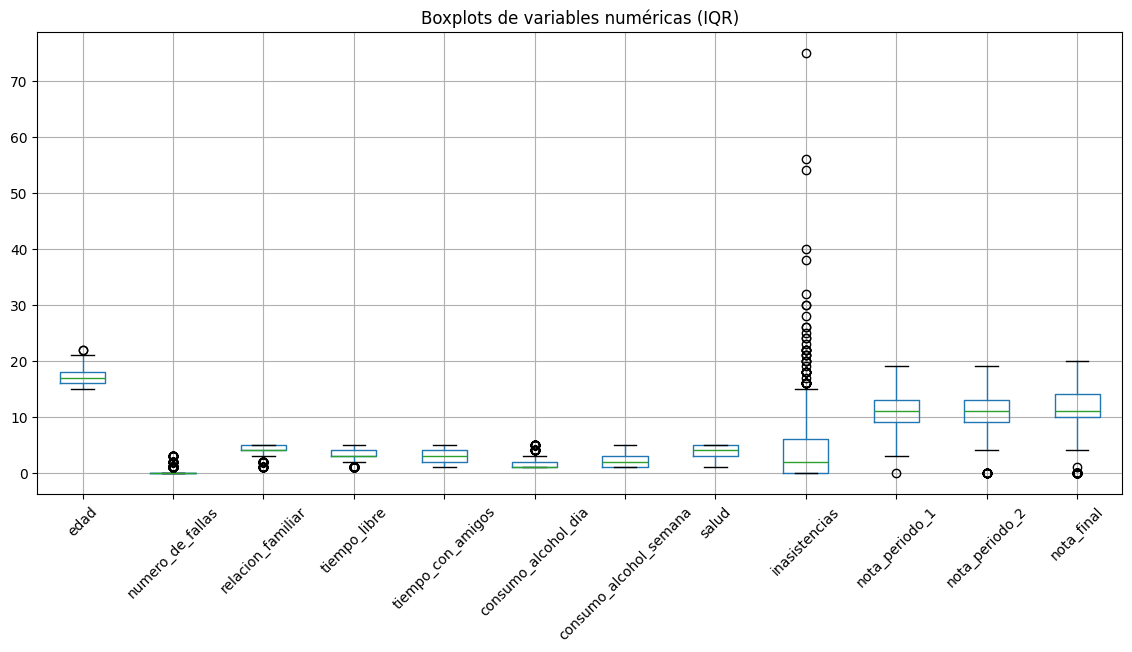

In [ ]:
# Diagrama de caja (boxplot) para cada variable
plt.figure(figsize=(14, 6))
df_num.drop(columns=["anomaly_score", "is_outlier"]).boxplot()
plt.title("Boxplots de variables numéricas (IQR)")
plt.xticks(rotation=45)
plt.show()

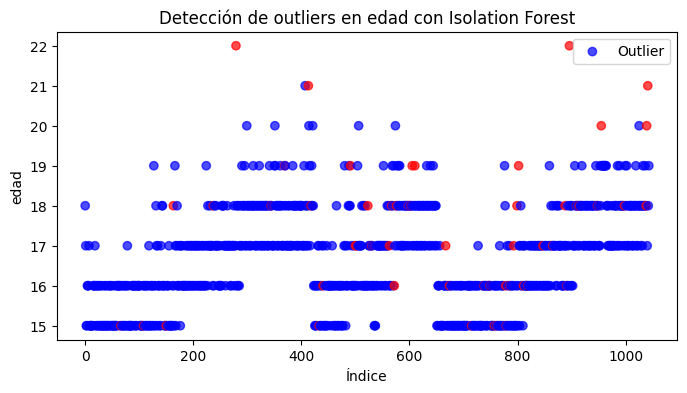

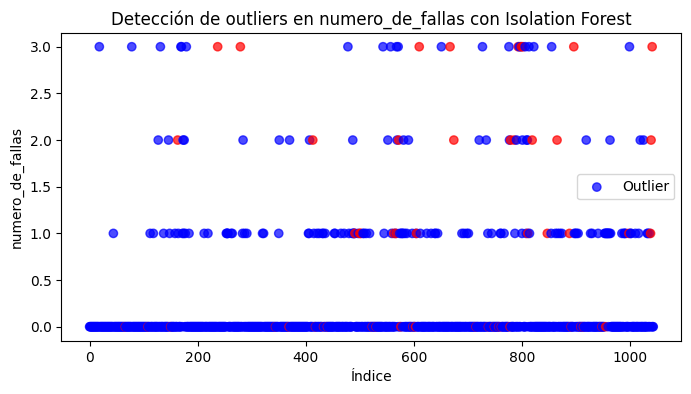

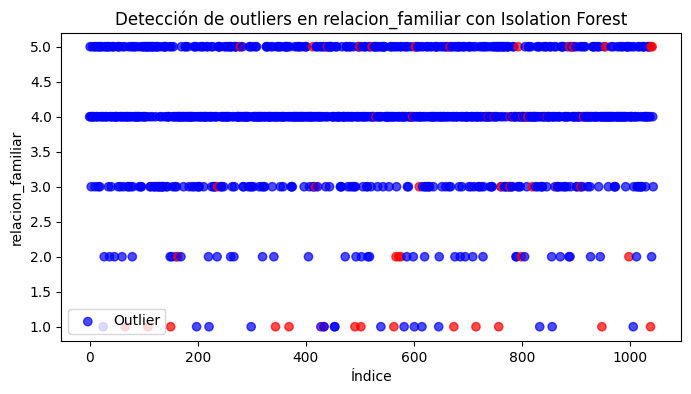

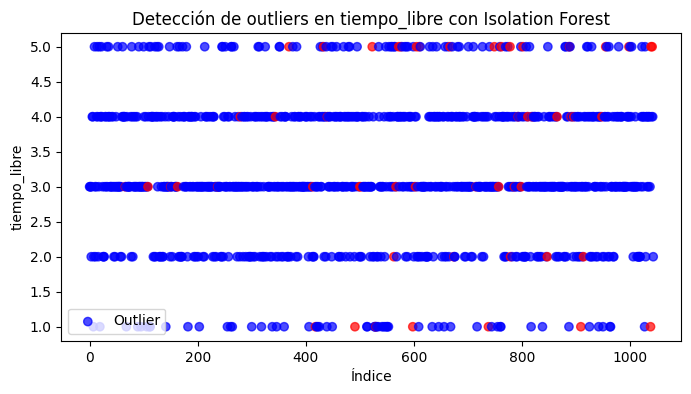

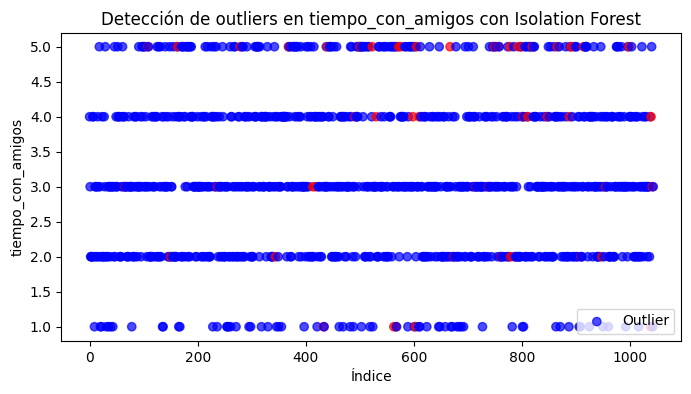

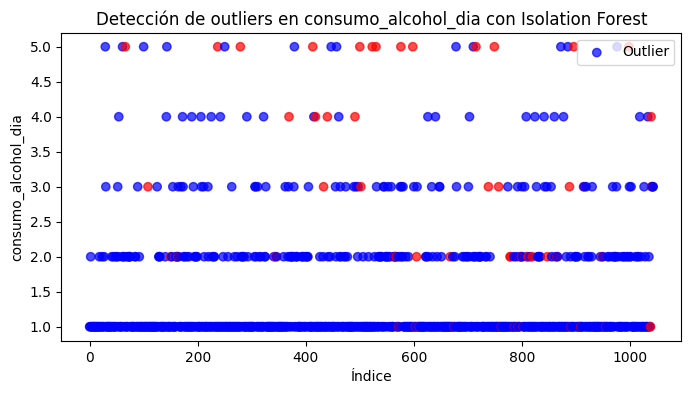

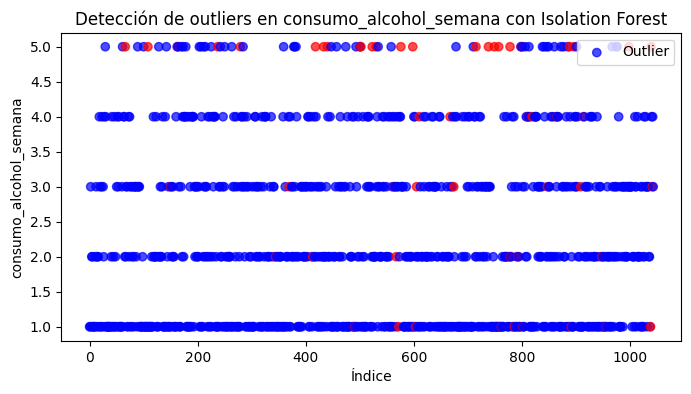

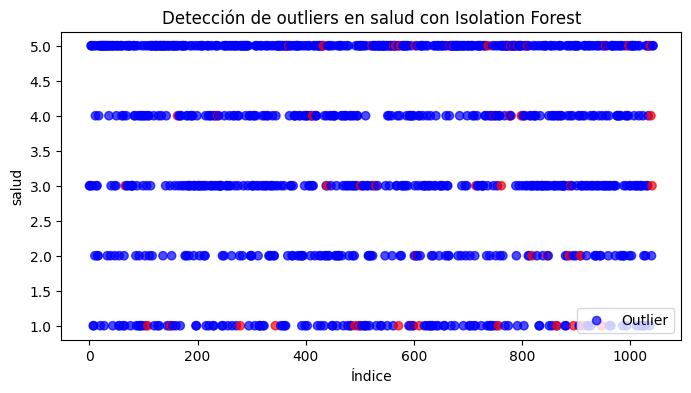

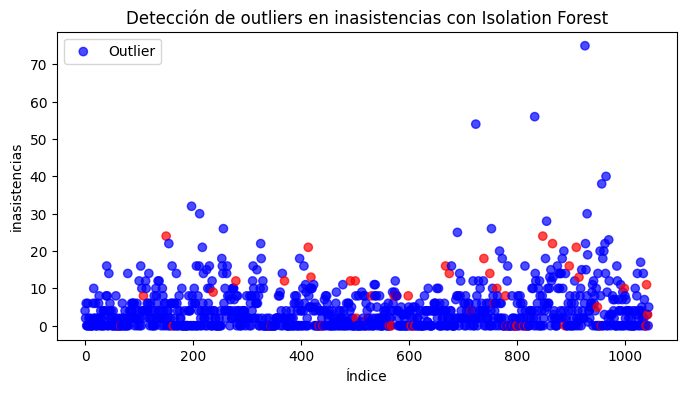

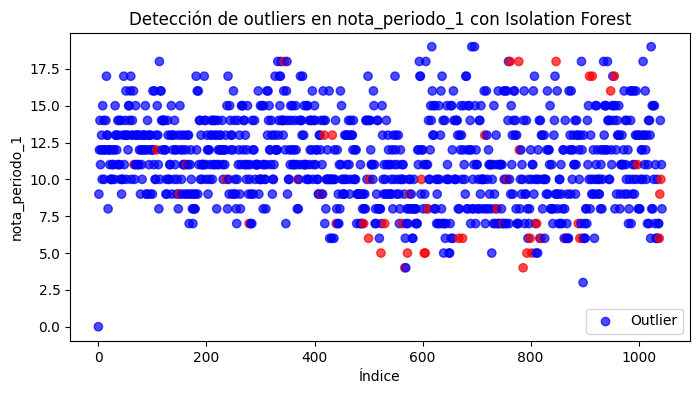

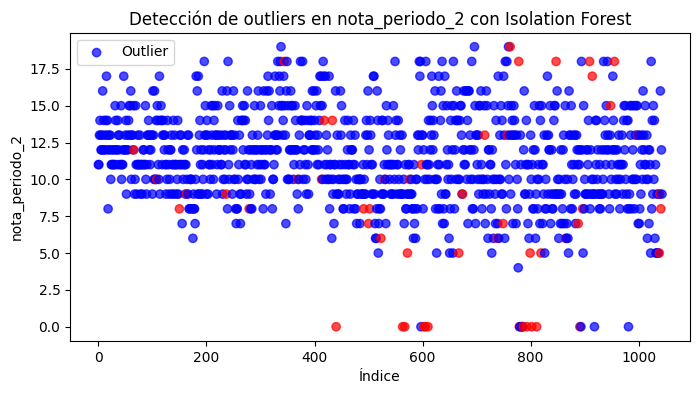

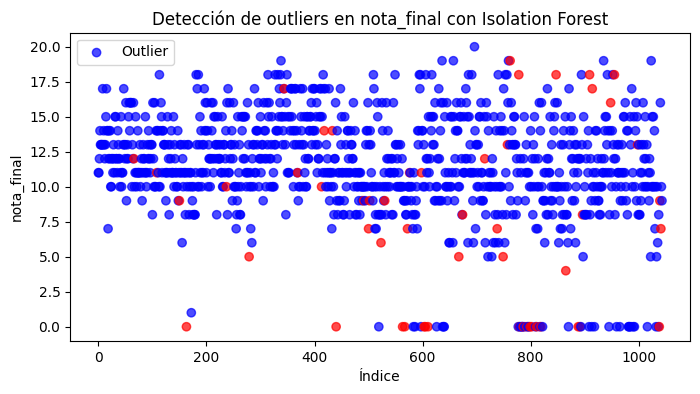

In [ ]:
# Gráfico de dispersión con outliers resaltados
for col in df_num.columns[:-2]:  # excluimos columnas agregadas
    plt.figure(figsize=(8, 4))
    plt.scatter(df_num.index, df_num[col],
                c=df_num["is_outlier"].map({True: "red", False: "blue"}),
                label="Outliers", alpha=0.7)
    plt.title(f"Detección de outliers en {col} con Isolation Forest")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.legend(["Outlier", "Normal"])
    plt.show()